In [1]:
import pypsa

In [2]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline
import numpy as np

In [20]:
nB00S0 = pypsa.Network("results/hiB/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B0p0-I-S0_2050.nc")
nB05S0 = pypsa.Network("results/hiB/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B0p5-I-S0_2050.nc")

nB00S300 = pypsa.Network("results/hiB/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B0p0-I-S300_2050.nc")
nB05S300 = pypsa.Network("results/hiB/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B0p5-I-S300_2050.nc")
nB10S300 = pypsa.Network("results/hiB/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B1p0-I-S300_2050.nc")

#nS300 = pypsa.Network("results/hiB/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-I-S1000_2050.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2L0p05-97H-T-H-B0p0-I-S0_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprec

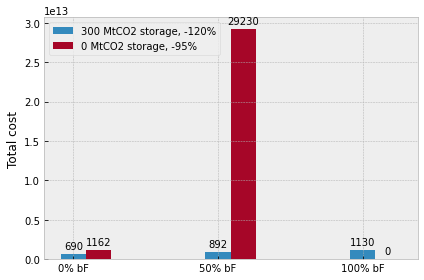

In [15]:
labels = ['0% bF','50% bF','100% bF']

costs1 = [nB00S0.objective,nB05S0.objective,0]#,nB10S0.objective]
costs2 = [nB00S300.objective,nB05S300.objective,nB10S300.objective]
#costs3 = [nS0.objective,0,0]
#costs2 = [n1_2_min20.objective,n2_2_min20.objective,n3_2_min20.objective]
#costs3 = [n1_1_05.objective,n2_1_05.objective,n3_1_05.objective]
#costs4 = [n1_2_05.objective,n2_2_05.objective,n3_2_05.objective]
x = np.arange(len(costs1))  # the label locations
width = 0.35  # the width of the bars

#plt.bar(x,costs,width)#,2,n2.objective,3,n3.objective) #billion EUR p.a.
fig, ax = plt.subplots()
#rects1 = ax.bar(x - width, costs4, width/2, label='300 MtCO2 storage, -95%')
#rects2 = ax.bar(x - width/2, costs3, width/2, label='3000 MtCO2 storage, -95%')
rects3 = ax.bar(x, costs2, width/2, label='300 MtCO2 storage, -120%')
rects4 = ax.bar(x + width/2, costs1, width/2, label='0 MtCO2 storage, -95%')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total cost')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = int(rect.get_height() / 1e9)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height*1e9),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

In [17]:
nB05S300.objective / 1e9

892.6433873601857

In [19]:
nB05S0.objective / 1e9

29230.558798876034

In [34]:
pypsa.linopt.get_dual(nB05S300,'GlobalConstraint')

AttributeError: 'Network' object has no attribute 'dualvalues'

In [3]:
nB00S1000 = pypsa.Network("results/hiB4/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B0p0-I-S1000_2050.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2L0p05-97H-T-H-B0p0-I-S1000_2050.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


In [8]:
from pypsa.linopt import get_dual
nB00S1000.duals#values
get_dual(nB00S1000,'Link')

AttributeError: 'Network' object has no attribute 'duals'

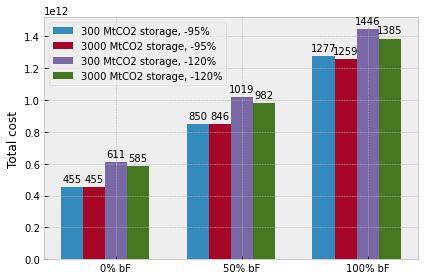

In [5]:
labels = ['0% bF','50% bF','100% bF']

costs1 = [n1_1_min20.objective,n2_1_min20.objective,n3_1_min20.objective]
costs2 = [n1_2_min20.objective,n2_2_min20.objective,n3_2_min20.objective]
costs3 = [n1_1_05.objective,n2_1_05.objective,n3_1_05.objective]
costs4 = [n1_2_05.objective,n2_2_05.objective,n3_2_05.objective]
x = np.arange(len(costs1))  # the label locations
width = 0.35  # the width of the bars

#plt.bar(x,costs,width)#,2,n2.objective,3,n3.objective) #billion EUR p.a.
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, costs4, width/2, label='300 MtCO2 storage, -95%')
rects2 = ax.bar(x - width/2, costs3, width/2, label='3000 MtCO2 storage, -95%')
rects3 = ax.bar(x, costs2, width/2, label='300 MtCO2 storage, -120%')
rects4 = ax.bar(x + width/2, costs1, width/2, label='3000 MtCO2 storage, -120%')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total cost')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = int(rect.get_height() / 1e9)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height*1e9),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()


In [7]:
n.stores_t.e.filter(regex='co2 stored') /1e6#.sum() / 1e6 #MtCO2

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


name,co2 stored
name,
2013-01-01 00:00:00,10.521040
2013-01-05 01:00:00,21.042191
2013-01-09 02:00:00,31.563341
2013-01-13 03:00:00,42.084491
2013-01-17 04:00:00,52.605641
...,...
2013-12-14 14:00:00,887.613071
2013-12-18 15:00:00,898.027214
2013-12-22 16:00:00,908.471997


In [24]:
nB00S1000.buses_t.marginal_price.filter(regex='oil').mean()

name
EU oil    50.009284
dtype: float64